In [ ]:
# EDA: SpineScope Project - Jackie Vescio

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set(style='whitegrid')

# Load dataset
df = pd.read_csv("column_2C_weka.csv")

# Preview the data
df.head()



,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [2]:
# This tells the number of rows and columns
df.shape

(310, 7)

In [3]:
# This shows column names, data types, and missing values (if any).
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [4]:
df.describe()	 

# This provides stats like mean, std deviation, min, max for each numerical column. 

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


In [5]:
df['class'].value_counts() 

# This will tell you how many patients are classified as Normal vs Abnormal. 

class
Abnormal    210
Normal      100
Name: count, dtype: int64

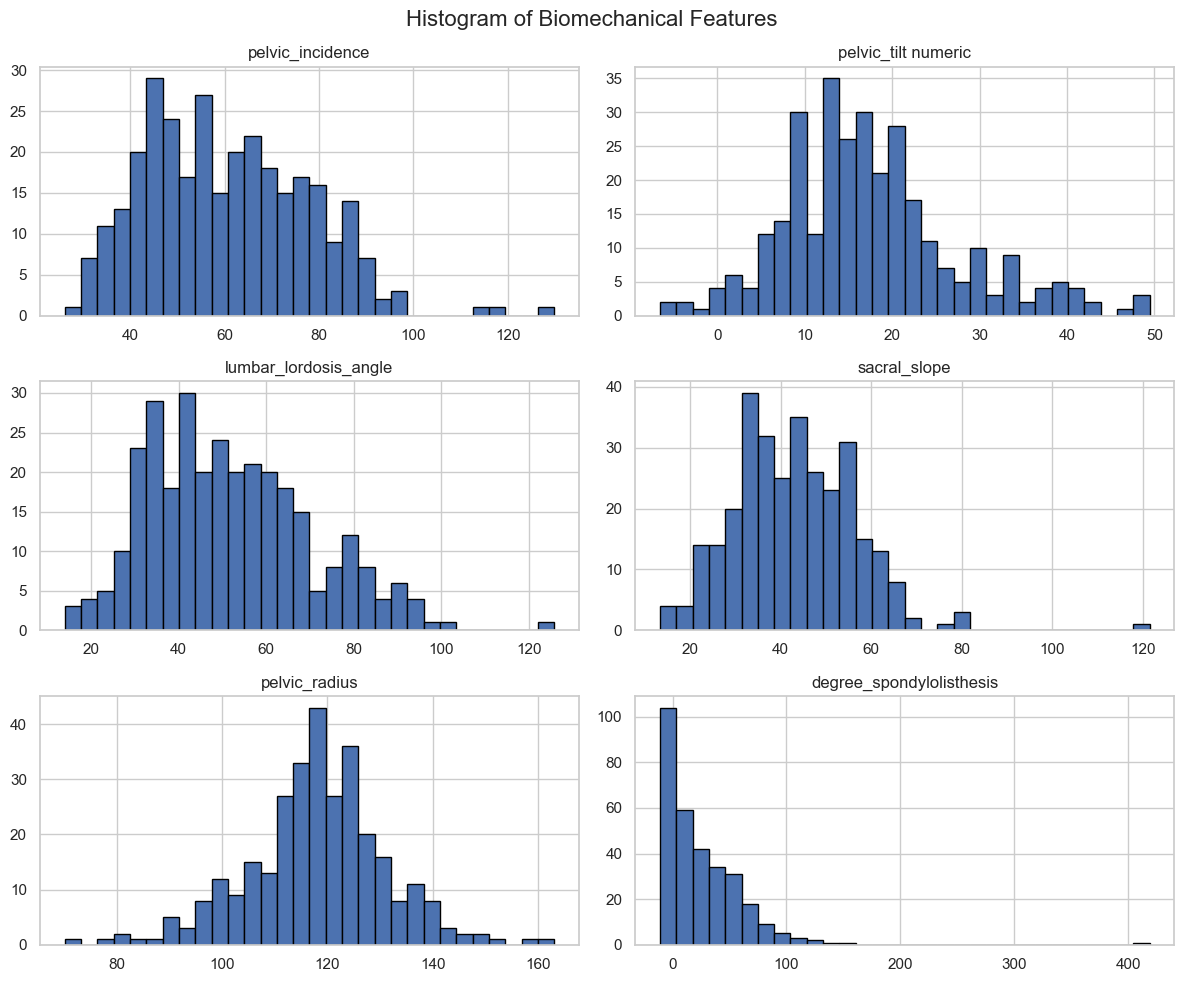

In [6]:
# Plot histograms for all numeric columns
df.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle('Histogram of Biomechanical Features', fontsize=16)
plt.tight_layout()
plt.show()


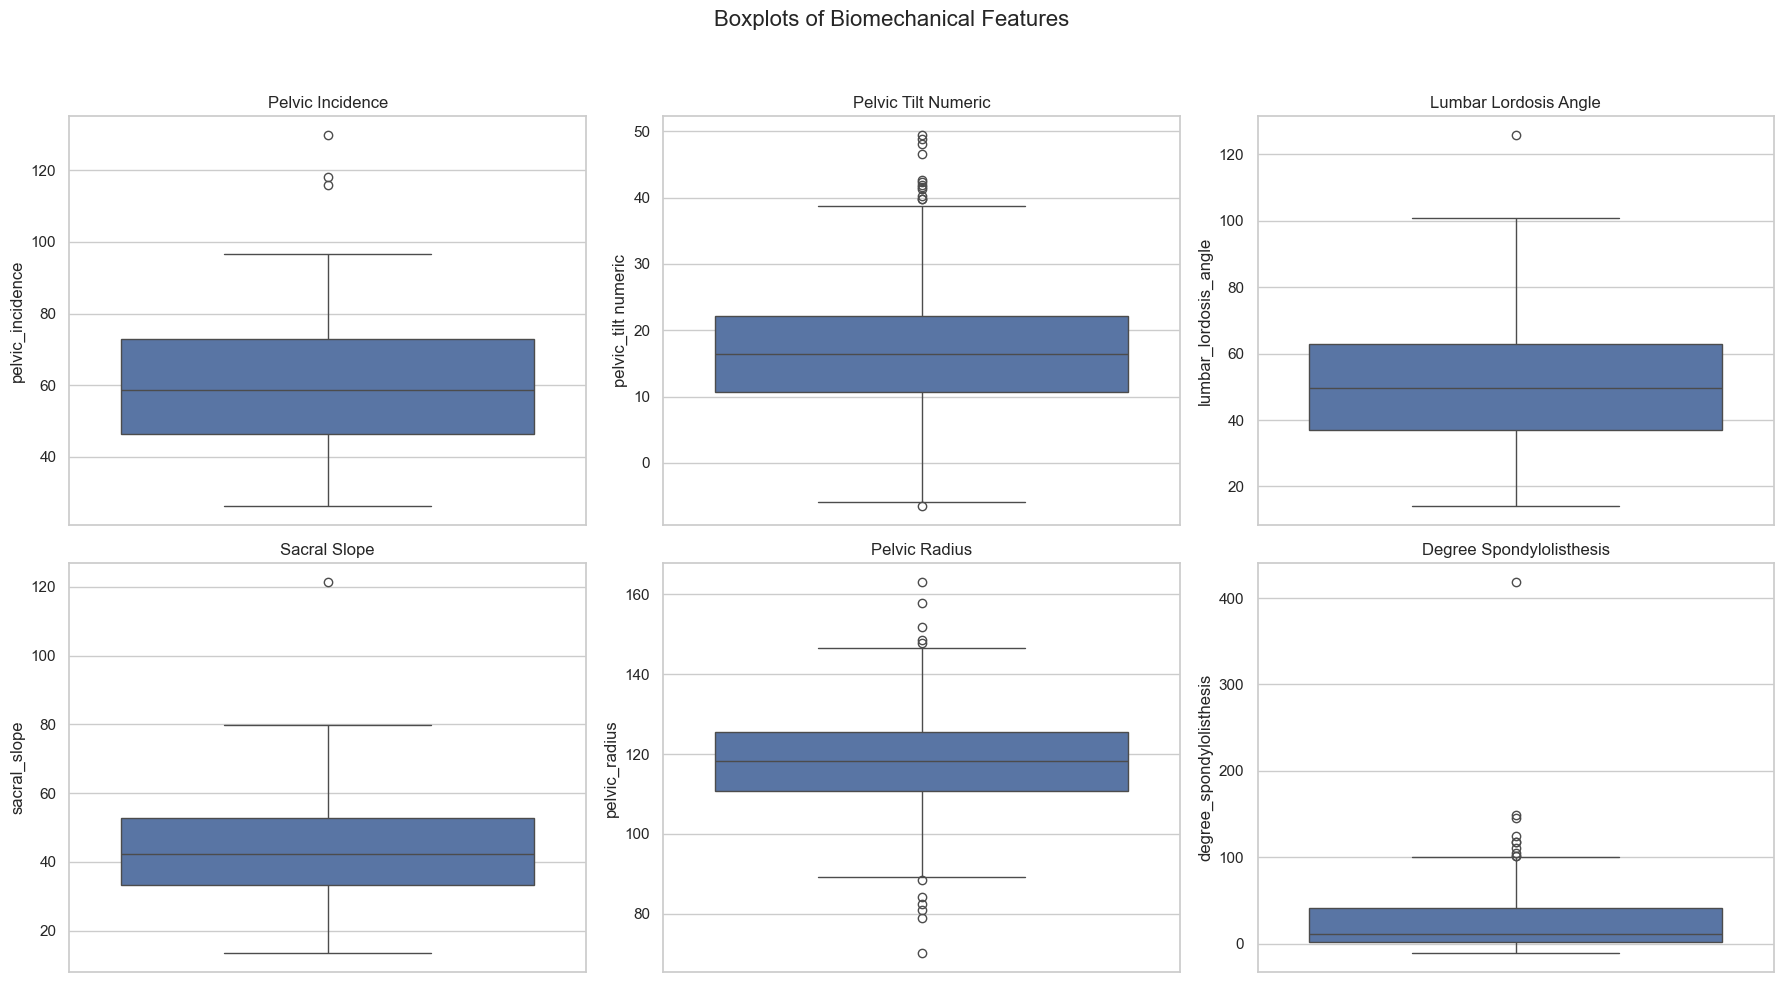

In [7]:
# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Boxplots of Biomechanical Features", fontsize=16)

# Feature list
features = [
    "pelvic_incidence",
    "pelvic_tilt numeric",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic_radius",
    "degree_spondylolisthesis"
]

# Plot each boxplot
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, y=feature, ax=axs[row][col])
    axs[row][col].set_title(feature.replace("_", " ").title())

plt.tight_layout(rect=[0, 0, 1, 0.95])  # leave space for suptitle
plt.show()

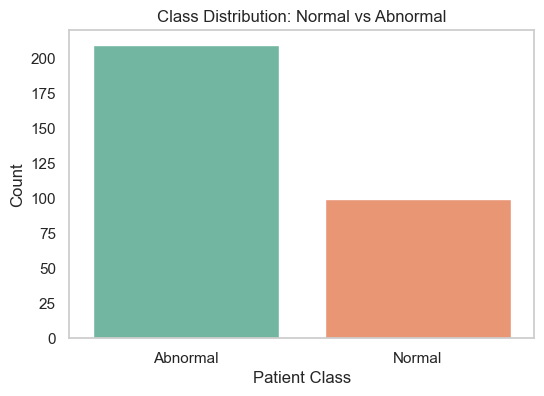

In [15]:
# Plot the class distribution
# To see how many patients fall into each category "Normal" or "Abnormal"

# Use only 2 colors
custom_palette = sns.color_palette("Set2", n_colors=2)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='class', hue='class', palette=custom_palette, legend=False)
plt.title('Class Distribution: Normal vs Abnormal')
plt.xlabel('Patient Class')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

C:\Users\jacki.JACKIESLAPTOP\AppData\Local\Temp\ipykernel_29664\323290554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y=feature, palette=['#66c2a5', '#fc8d62'])
C:\Users\jacki.JACKIESLAPTOP\AppData\Local\Temp\ipykernel_29664\323290554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y=feature, palette=['#66c2a5', '#fc8d62'])
C:\Users\jacki.JACKIESLAPTOP\AppData\Local\Temp\ipykernel_29664\323290554.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='class', y=feature, palette=[

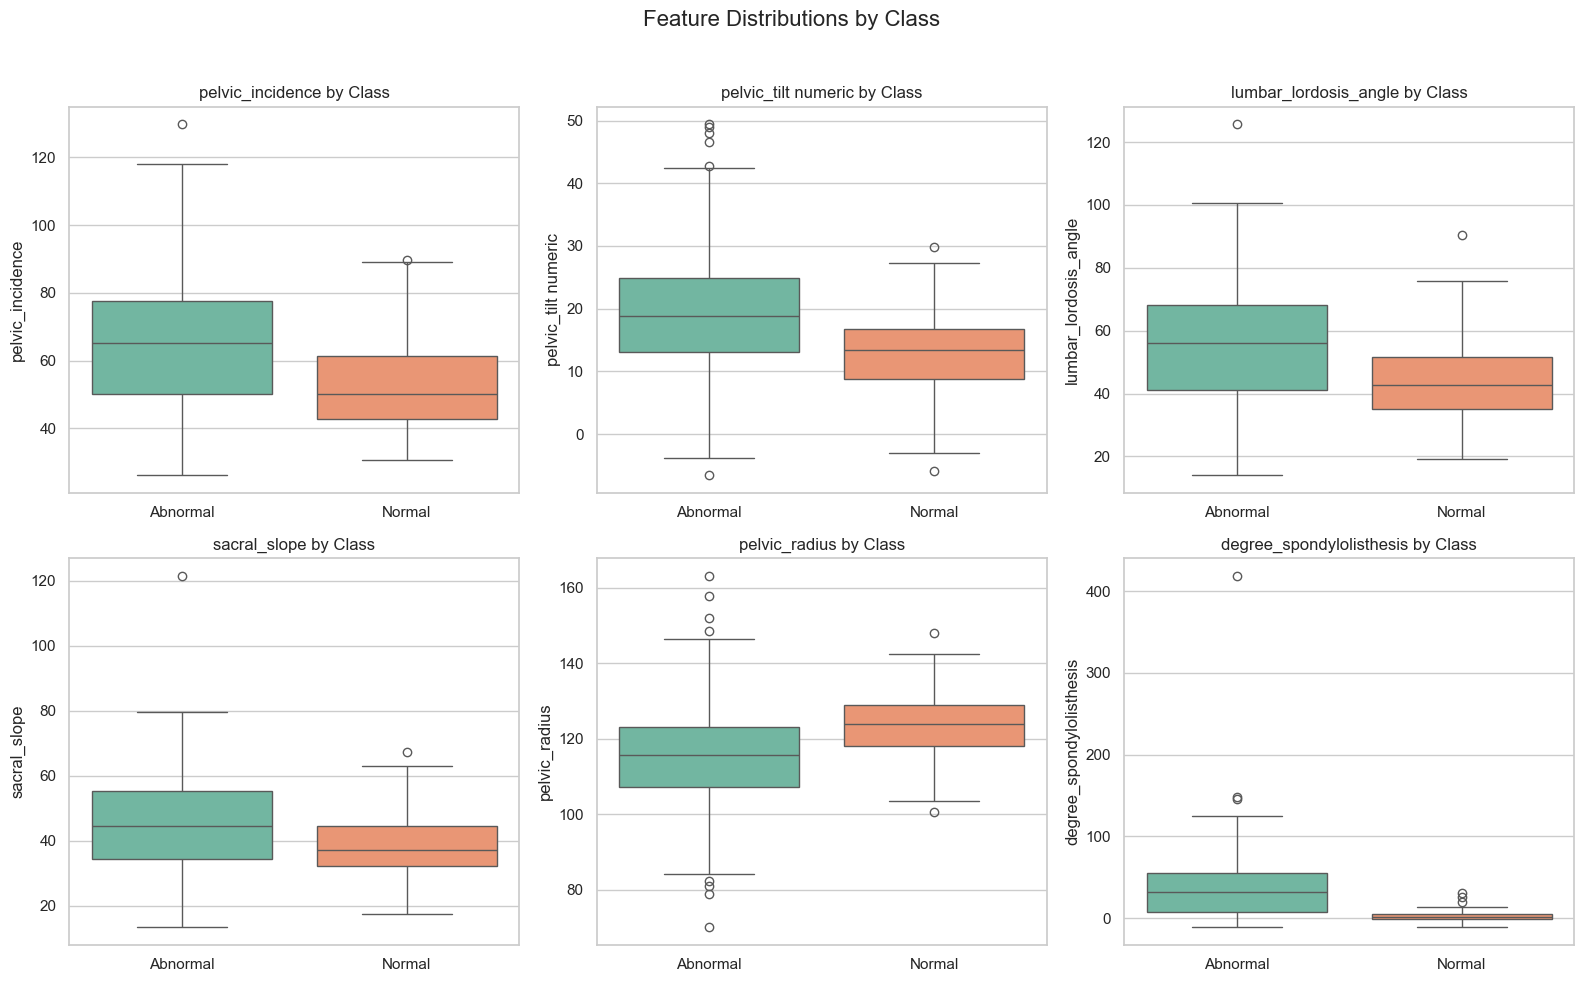

In [ ]:
# Compare Feature Distributions by Class Using Boxplots
# This will show how each biomechanical feature differs between the two patient classes: Normal vs Abnormal. 
# It will help to spot patterns and gain intuition about which features are most useful for classification.

# Set up the plot grid
plt.figure(figsize=(16, 10))
feature_list = df.columns[:-1]  # All columns except 'class'

for i, feature in enumerate(feature_list):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='class', y=feature, hue='class', legend=False, palette=['#66c2a5', '#fc8d62'])
    plt.title(f'{feature} by Class')
    plt.xlabel('')
    plt.ylabel(feature)

plt.suptitle('Feature Distributions by Class', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
